In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torchvision.models import densenet121, DenseNet121_Weights
from torch.utils.data import DataLoader, Sampler
from AdaIN import AdaIN

In [2]:
dn = densenet121(weights = DenseNet121_Weights.DEFAULT)
print(dn)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [3]:
style_path = "style/sketch.png"
image_path = "content/avril.jpg"

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(256),
    transforms.ToTensor()
])

#coco content
train_content_dataset = datasets.ImageFolder(
    root= "../coco",             
    transform=transform
)

#wikiart
train_style_dataset = datasets.ImageFolder(
    root= "../archive",             
    transform=transform
)

train_content_loader = DataLoader(train_content_dataset, batch_size=1, shuffle=True)
train_style_loader = DataLoader(train_style_dataset, batch_size=1, shuffle=True)

In [4]:
encoder = nn.Sequential(*list(dn.features.children())[:8])
print(encoder)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): _DenseBlock(
    (denselayer1): _DenseLayer(
      (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU(inplace=True)
      (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (denselayer2): _DenseLayer(
      (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv2d(96, 128, kernel_size=(1, 1), stride=(

In [5]:

# l8Model = AdaIN()
# l8Model.uploadEncoder(encoder)
# l8Model.uploadDecoder(l8Model.vggDecoder(256))
# l8Model.epochTraining(train_content_loader, train_style_loader, "dn_l8", steps = 20000, epoch = 5, style_weight = 1.0, content_weight=1.0)
# l8Model.fit(image_path,[style_path])
# l8Model.pipeline()
# l8Model.displayImages()
# l8Model.evaluate()

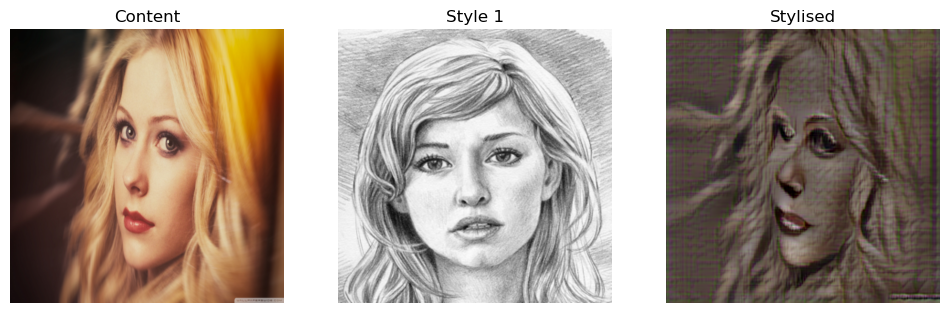

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


(0.8, 273.68679200299084)

In [6]:
l8Model = AdaIN(prebuild_decoder = "dn_l8_5.pth")
l8Model.uploadEncoder(encoder)
l8Model.uploadDecoder(l8Model.vggDecoder(256))
l8Model.setup()
l8Model.fit(image_path,[style_path])
l8Model.pipeline()
l8Model.displayImages()
l8Model.evaluate()

In [7]:
encoderL7 = nn.Sequential(*list(dn.features.children())[:7])
#Traing complete
# defaultModel = AdaIN()
# defaultModel.uploadEncoder(encoderL7)
# defaultModel.epochTraining(train_content_loader, train_style_loader, "dn_default", steps = 20000, epoch = 5, style_weight = 1.0, content_weight=1.0)
# defaultModel.fit(image_path,[style_path])
# defaultModel.pipeline()
# defaultModel.displayImages()
# defaultModel.evaluate()

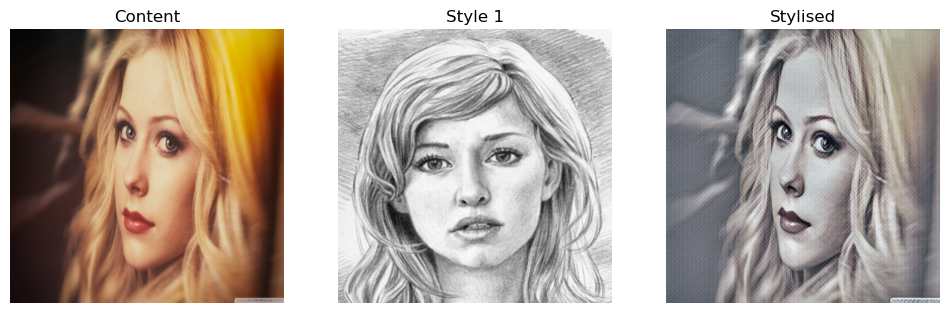

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


(0.587, 152.44375000474975)

In [11]:
defaultModel = AdaIN(prebuild_decoder = "dn_default_5.pth")
defaultModel.uploadEncoder(encoderL7)
defaultModel.setup()
defaultModel.fit(image_path,[style_path])
defaultModel.pipeline()
defaultModel.displayImages()
defaultModel.evaluate()

Training at content: 10.0 and style: 10.0
Epoch: 1
[1000/20000] content=0.0766 style=0.0168 total=0.093425
[2000/20000] content=0.0505 style=0.0099 total=0.060391
[3000/20000] content=0.0419 style=0.0084 total=0.050347
[4000/20000] content=0.0385 style=0.0081 total=0.046617
[5000/20000] content=0.0351 style=0.0073 total=0.042411
[6000/20000] content=0.0341 style=0.0074 total=0.041477
[7000/20000] content=0.0328 style=0.0074 total=0.040175
[8000/20000] content=0.0322 style=0.0074 total=0.039574
[9000/20000] content=0.0311 style=0.0072 total=0.038359
[10000/20000] content=0.0303 style=0.0070 total=0.037324
[11000/20000] content=0.0293 style=0.0068 total=0.036056
[12000/20000] content=0.0286 style=0.0069 total=0.035499
[13000/20000] content=0.0283 style=0.0067 total=0.035076
[14000/20000] content=0.0287 style=0.0071 total=0.035831
[15000/20000] content=0.0273 style=0.0065 total=0.033788
[16000/20000] content=0.0273 style=0.0067 total=0.033980
[17000/20000] content=0.0276 style=0.0068 tota

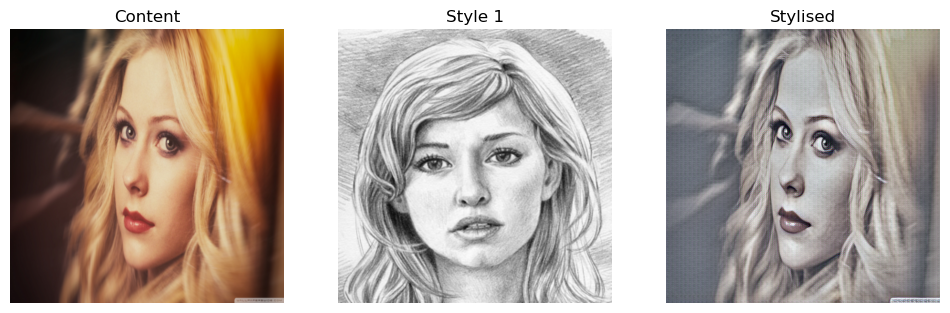

Training at content: 10.0 and style: 30.0
Epoch: 1
[1000/20000] content=0.0943 style=0.0460 total=0.140306
[2000/20000] content=0.0658 style=0.0272 total=0.093077
[3000/20000] content=0.0562 style=0.0238 total=0.080002
[4000/20000] content=0.0493 style=0.0205 total=0.069808
[5000/20000] content=0.0461 style=0.0196 total=0.065682
[6000/20000] content=0.0430 style=0.0184 total=0.061352
[7000/20000] content=0.0408 style=0.0173 total=0.058071
[8000/20000] content=0.0404 style=0.0180 total=0.058389
[9000/20000] content=0.0388 style=0.0168 total=0.055618
[10000/20000] content=0.0376 style=0.0163 total=0.053907
[11000/20000] content=0.0367 style=0.0160 total=0.052644
[12000/20000] content=0.0361 style=0.0162 total=0.052261
[13000/20000] content=0.0355 style=0.0157 total=0.051198
[14000/20000] content=0.0351 style=0.0151 total=0.050258
[15000/20000] content=0.0348 style=0.0156 total=0.050452
[16000/20000] content=0.0344 style=0.0152 total=0.049663
[17000/20000] content=0.0338 style=0.0151 tota

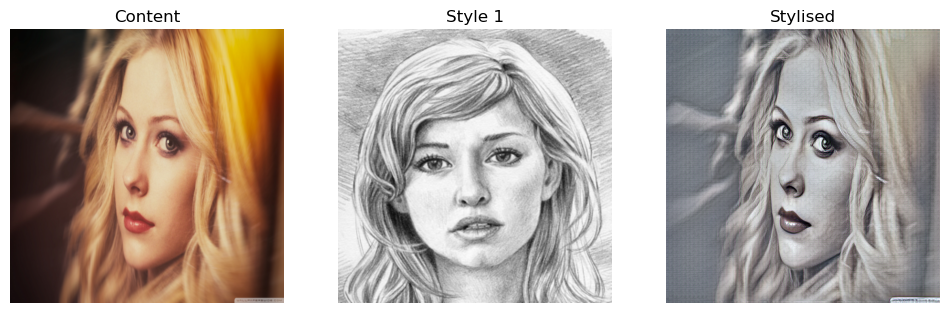

In [13]:
#Parameter to Train
style_w= [10.0, 30.0]
content_w= [10.0]


# Training Complete
for cw in content_w:
    for sw in style_w:
        print(f"Training at content: {cw} and style: {sw}")
        model = AdaIN()
        model.uploadEncoder(encoderL7)
        model.epochTraining(train_content_loader, train_style_loader, f"dn_default_{int(cw)}_{int(sw)}", steps = 20000, epoch = 5, style_weight = sw, content_weight=cw)
        model.fit(image_path,[style_path])
        model.pipeline()
        model.displayImages()

Training at content: 1.0 and style: 40.0
Epoch: 1
[1000/20000] content=0.0137 style=0.0608 total=0.074516
[2000/20000] content=0.0126 style=0.0358 total=0.048362
[3000/20000] content=0.0117 style=0.0305 total=0.042279
[4000/20000] content=0.0113 style=0.0260 total=0.037357
[5000/20000] content=0.0110 style=0.0244 total=0.035445
[6000/20000] content=0.0108 style=0.0228 total=0.033629
[7000/20000] content=0.0106 style=0.0221 total=0.032738
[8000/20000] content=0.0103 style=0.0198 total=0.030083
[9000/20000] content=0.0100 style=0.0184 total=0.028436
[10000/20000] content=0.0098 style=0.0189 total=0.028768
[11000/20000] content=0.0097 style=0.0177 total=0.027362
[12000/20000] content=0.0096 style=0.0176 total=0.027178
[13000/20000] content=0.0093 style=0.0160 total=0.025282
[14000/20000] content=0.0091 style=0.0145 total=0.023649
[15000/20000] content=0.0090 style=0.0148 total=0.023861
[16000/20000] content=0.0090 style=0.0147 total=0.023654
[17000/20000] content=0.0088 style=0.0141 total

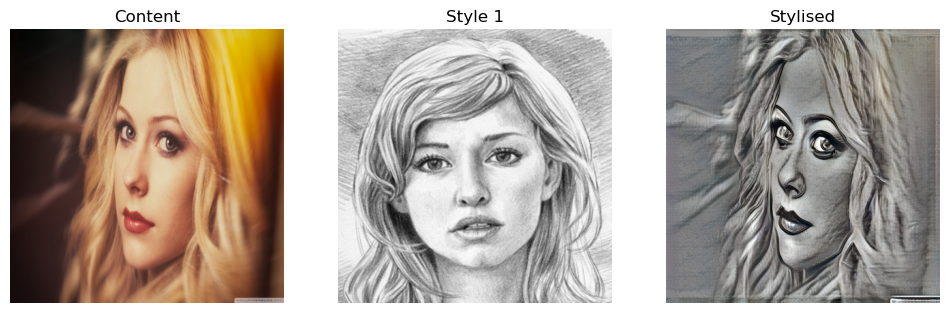

Training at content: 1.0 and style: 50.0
Epoch: 1
[1000/20000] content=0.0141 style=0.0732 total=0.087372
[2000/20000] content=0.0128 style=0.0435 total=0.056346
[3000/20000] content=0.0126 style=0.0374 total=0.050005
[4000/20000] content=0.0121 style=0.0356 total=0.047744
[5000/20000] content=0.0117 style=0.0307 total=0.042416
[6000/20000] content=0.0115 style=0.0306 total=0.042062
[7000/20000] content=0.0112 style=0.0266 total=0.037836
[8000/20000] content=0.0110 style=0.0257 total=0.036730
[9000/20000] content=0.0107 style=0.0241 total=0.034762
[10000/20000] content=0.0107 style=0.0241 total=0.034817
[11000/20000] content=0.0105 style=0.0227 total=0.033248
[12000/20000] content=0.0103 style=0.0215 total=0.031860
[13000/20000] content=0.0101 style=0.0202 total=0.030287
[14000/20000] content=0.0101 style=0.0197 total=0.029783
[15000/20000] content=0.0100 style=0.0196 total=0.029591
[16000/20000] content=0.0097 style=0.0184 total=0.028092
[17000/20000] content=0.0097 style=0.0185 total

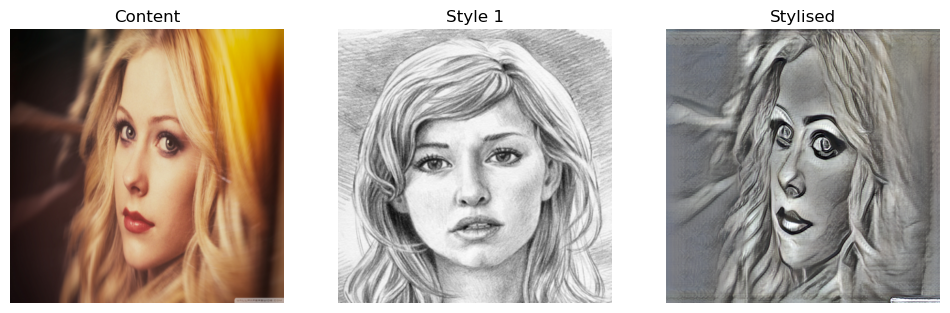

Training at content: 2.0 and style: 40.0
Epoch: 1
[1000/20000] content=0.0256 style=0.0564 total=0.082073
[2000/20000] content=0.0224 style=0.0342 total=0.056652
[3000/20000] content=0.0211 style=0.0310 total=0.052095
[4000/20000] content=0.0197 style=0.0266 total=0.046366
[5000/20000] content=0.0186 style=0.0240 total=0.042608
[6000/20000] content=0.0178 style=0.0221 total=0.039866
[7000/20000] content=0.0170 style=0.0210 total=0.038006
[8000/20000] content=0.0169 style=0.0206 total=0.037547
[9000/20000] content=0.0160 style=0.0186 total=0.034568
[10000/20000] content=0.0156 style=0.0179 total=0.033506
[11000/20000] content=0.0151 style=0.0172 total=0.032387
[12000/20000] content=0.0148 style=0.0164 total=0.031168
[13000/20000] content=0.0145 style=0.0161 total=0.030599
[14000/20000] content=0.0144 style=0.0159 total=0.030229
[15000/20000] content=0.0139 style=0.0147 total=0.028639
[16000/20000] content=0.0138 style=0.0148 total=0.028553
[17000/20000] content=0.0136 style=0.0144 total

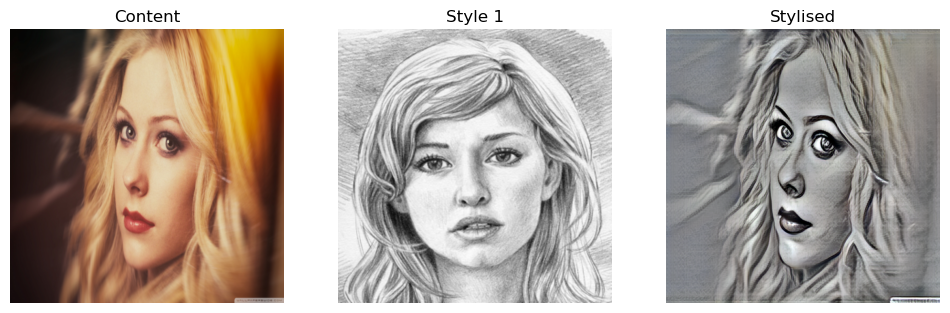

Training at content: 2.0 and style: 50.0
Epoch: 1
[1000/20000] content=0.0260 style=0.0768 total=0.102797
[2000/20000] content=0.0232 style=0.0448 total=0.068029
[3000/20000] content=0.0222 style=0.0383 total=0.060541
[4000/20000] content=0.0208 style=0.0320 total=0.052888
[5000/20000] content=0.0193 style=0.0288 total=0.048100
[6000/20000] content=0.0191 style=0.0282 total=0.047367
[7000/20000] content=0.0182 style=0.0250 total=0.043189
[8000/20000] content=0.0176 style=0.0239 total=0.041451
[9000/20000] content=0.0173 style=0.0229 total=0.040127
[10000/20000] content=0.0167 style=0.0225 total=0.039268
[11000/20000] content=0.0163 style=0.0211 total=0.037479
[12000/20000] content=0.0159 style=0.0207 total=0.036646
[13000/20000] content=0.0157 style=0.0196 total=0.035261
[14000/20000] content=0.0152 style=0.0189 total=0.034105
[15000/20000] content=0.0148 style=0.0183 total=0.033076
[16000/20000] content=0.0146 style=0.0176 total=0.032166
[17000/20000] content=0.0146 style=0.0185 total

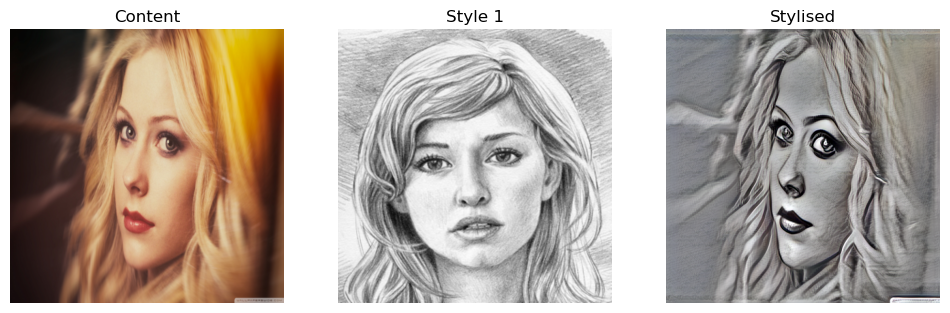

Training at content: 3.0 and style: 40.0
Epoch: 1
[1000/20000] content=0.0374 style=0.0572 total=0.094696
[2000/20000] content=0.0303 style=0.0341 total=0.064473
[3000/20000] content=0.0278 style=0.0297 total=0.057463
[4000/20000] content=0.0261 style=0.0271 total=0.053193
[5000/20000] content=0.0238 style=0.0234 total=0.047175
[6000/20000] content=0.0227 style=0.0214 total=0.044140
[7000/20000] content=0.0219 style=0.0207 total=0.042644
[8000/20000] content=0.0207 style=0.0198 total=0.040514
[9000/20000] content=0.0200 style=0.0181 total=0.038112
[10000/20000] content=0.0196 style=0.0173 total=0.036874
[11000/20000] content=0.0196 style=0.0172 total=0.036784
[12000/20000] content=0.0183 style=0.0159 total=0.034171
[13000/20000] content=0.0181 style=0.0155 total=0.033599
[14000/20000] content=0.0179 style=0.0155 total=0.033443
[15000/20000] content=0.0178 style=0.0154 total=0.033218
[16000/20000] content=0.0175 style=0.0156 total=0.033099
[17000/20000] content=0.0173 style=0.0157 total

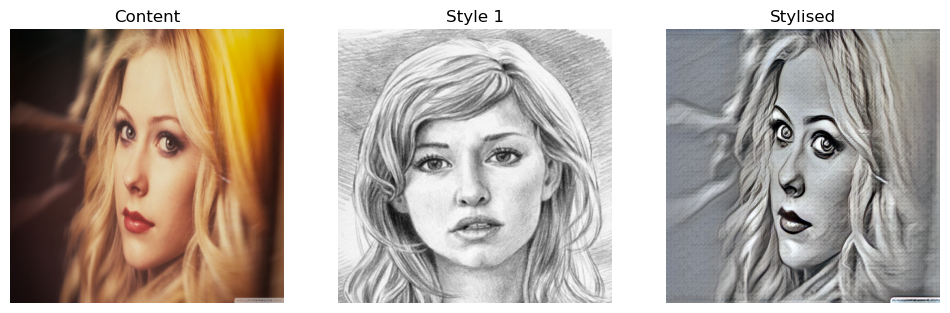

Training at content: 3.0 and style: 50.0
Epoch: 1
[1000/20000] content=0.0376 style=0.0713 total=0.108922
[2000/20000] content=0.0334 style=0.0435 total=0.076866
[3000/20000] content=0.0305 style=0.0364 total=0.066959
[4000/20000] content=0.0295 style=0.0347 total=0.064114
[5000/20000] content=0.0269 style=0.0296 total=0.056416
[6000/20000] content=0.0253 style=0.0272 total=0.052575
[7000/20000] content=0.0249 style=0.0269 total=0.051770
[8000/20000] content=0.0240 style=0.0255 total=0.049435
[9000/20000] content=0.0224 style=0.0215 total=0.043858
[10000/20000] content=0.0220 style=0.0221 total=0.044098
[11000/20000] content=0.0214 style=0.0212 total=0.042625
[12000/20000] content=0.0213 style=0.0216 total=0.042959
[13000/20000] content=0.0206 style=0.0206 total=0.041145
[14000/20000] content=0.0205 style=0.0205 total=0.040941
[15000/20000] content=0.0198 style=0.0193 total=0.039077
[16000/20000] content=0.0192 style=0.0180 total=0.037235
[17000/20000] content=0.0192 style=0.0183 total

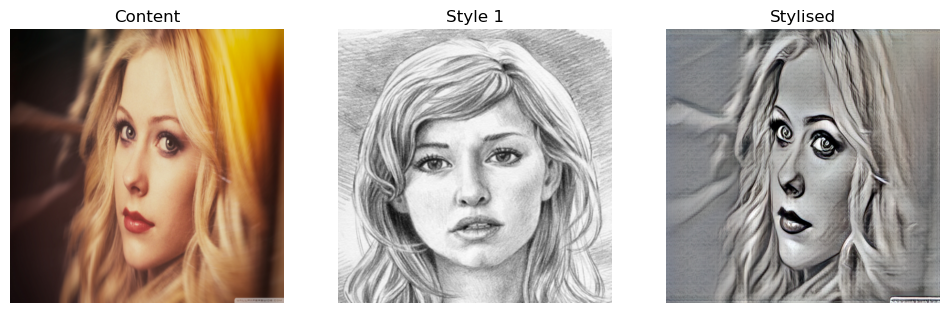

In [17]:
#Parameter to Train
style_w= [40.0, 50.0]
content_w= [1.0, 2.0, 3.0]


# Training Complete
for cw in content_w:
    for sw in style_w:
        print(f"Training at content: {cw} and style: {sw}")
        model = AdaIN()
        model.uploadEncoder(encoderL7)
        model.epochTraining(train_content_loader, train_style_loader, f"dn_default_{int(cw)}_{int(sw)}", steps = 20000, epoch = 5, style_weight = sw, content_weight=cw)
        model.fit(image_path,[style_path])
        model.pipeline()
        model.displayImages()

Epoch: 1
[1000/20000] content=0.0152 style=0.0044 total=0.019639
[2000/20000] content=0.0135 style=0.0030 total=0.016526
[3000/20000] content=0.0133 style=0.0029 total=0.016215
[4000/20000] content=0.0131 style=0.0028 total=0.015873
[5000/20000] content=0.0130 style=0.0028 total=0.015807
[6000/20000] content=0.0130 style=0.0028 total=0.015776
[7000/20000] content=0.0128 style=0.0027 total=0.015566
[8000/20000] content=0.0128 style=0.0027 total=0.015511
[9000/20000] content=0.0130 style=0.0028 total=0.015714
[10000/20000] content=0.0129 style=0.0027 total=0.015595
[11000/20000] content=0.0129 style=0.0027 total=0.015618
[12000/20000] content=0.0127 style=0.0026 total=0.015304
[13000/20000] content=0.0128 style=0.0026 total=0.015443
[14000/20000] content=0.0128 style=0.0026 total=0.015468
[15000/20000] content=0.0128 style=0.0026 total=0.015445
[16000/20000] content=0.0126 style=0.0026 total=0.015180
[17000/20000] content=0.0127 style=0.0026 total=0.015343
[18000/20000] content=0.0127 st

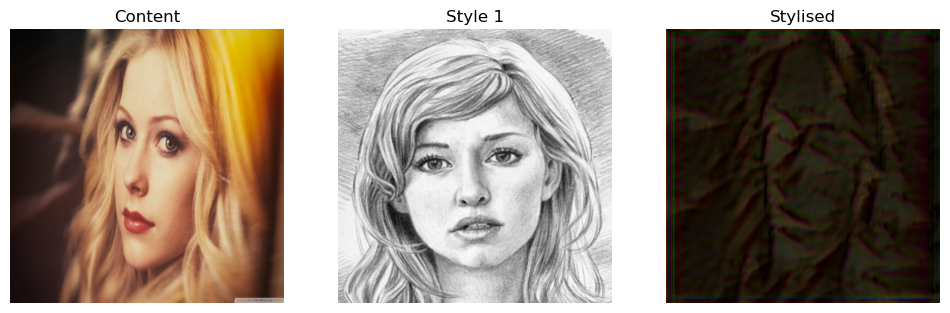

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


(0.716, 242.28983302600682)

In [14]:

def layer2Reverse():
    return nn.Sequential(
        nn.Conv2d(512, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 480, 1),
        nn.ReLU(inplace=True), 
        
        nn.Conv2d(480, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 448, 1),
        nn.ReLU(inplace=True), 
        
        nn.Conv2d(448, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 416, 1),
        nn.ReLU(inplace=True), 
        
        nn.Conv2d(416, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 384, 1),
        nn.ReLU(inplace=True), 
        
        nn.Conv2d(384, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 352, 1),
        nn.ReLU(inplace=True), 
        
        nn.Conv2d(352, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 320, 1),
        nn.ReLU(inplace=True), 
        
        nn.Conv2d(320, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 288, 1),
        nn.ReLU(inplace=True), 
        
        nn.Conv2d(288, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 256, 1),
        nn.ReLU(inplace=True), 
        
        nn.Conv2d(256, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 224, 1),
        nn.ReLU(inplace=True), 
        
        nn.Conv2d(224, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 192, 1),
        nn.ReLU(inplace=True), 
        
        nn.Conv2d(192, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 160, 1),
        nn.ReLU(inplace=True), 
        
        nn.Conv2d(160, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 128, 1),
        nn.ReLU(inplace=True), 
        
        #Transition
        nn.Conv2d(128, 256, 1),
        nn.ReLU(inplace=True), 
        nn.Upsample(scale_factor=2, mode="nearest"),

        #Dense block 1
        nn.Conv2d(256, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 224, 1),
        nn.ReLU(inplace=True), 
        
        nn.Conv2d(224, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 192, 1),
        nn.ReLU(inplace=True), 
        
        nn.Conv2d(192, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 160, 1),
        nn.ReLU(inplace=True), 
        
        nn.Conv2d(160, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 128, 1),
        nn.ReLU(inplace=True), 

        nn.Conv2d(128, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 96, 1),
        nn.ReLU(inplace=True), 
        
        nn.Conv2d(96, 128, 3, padding=1),
        nn.ReLU(inplace=True), 
        nn.Conv2d(128, 64, 1),
        nn.ReLU(inplace=True), 

        nn.Conv2d(64, 3, 7, padding=3),
    )

newDecoderModel = AdaIN()
newDecoderModel.uploadEncoder(encoderL7)
newDecoderModel.uploadDecoder(layer2Reverse())
newDecoderModel.epochTraining(train_content_loader, train_style_loader, "dn_new_decoder", steps = 20000, epoch = 5, style_weight = 1.0, content_weight=1.0)
newDecoderModel.fit(image_path,[style_path])
newDecoderModel.pipeline()
newDecoderModel.displayImages()
newDecoderModel.evaluate()


Epoch: 1
[1000/20000] content=0.0107 style=0.0032 total=0.013859
[2000/20000] content=0.0084 style=0.0017 total=0.010063
[3000/20000] content=0.0073 style=0.0014 total=0.008724
[4000/20000] content=0.0067 style=0.0013 total=0.007976
[5000/20000] content=0.0062 style=0.0012 total=0.007383
[6000/20000] content=0.0058 style=0.0011 total=0.006910
[7000/20000] content=0.0056 style=0.0011 total=0.006682
[8000/20000] content=0.0053 style=0.0010 total=0.006272
[9000/20000] content=0.0052 style=0.0010 total=0.006196
[10000/20000] content=0.0050 style=0.0010 total=0.005981
[11000/20000] content=0.0049 style=0.0009 total=0.005864
[12000/20000] content=0.0049 style=0.0009 total=0.005793
[13000/20000] content=0.0047 style=0.0009 total=0.005524
[14000/20000] content=0.0047 style=0.0009 total=0.005628
[15000/20000] content=0.0045 style=0.0009 total=0.005395
[16000/20000] content=0.0045 style=0.0009 total=0.005347
[17000/20000] content=0.0044 style=0.0009 total=0.005220
[18000/20000] content=0.0043 st

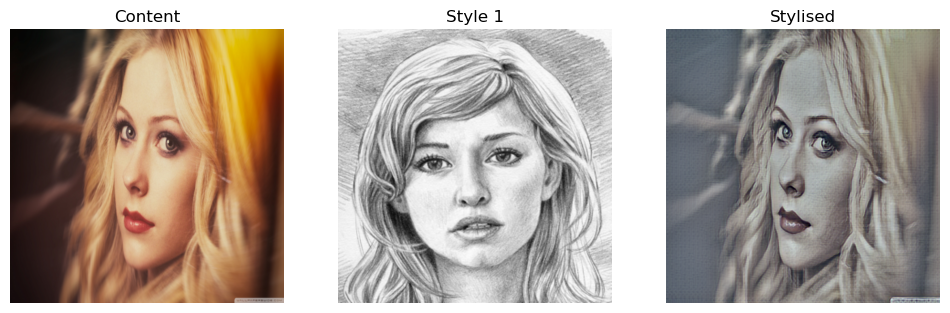

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


(0.678, 1759.175957995467)

In [19]:
lowLRModel = AdaIN()
lowLRModel.uploadEncoder(encoderL7)
lowLRModel.epochTraining(train_content_loader, train_style_loader, "dn_default_lowLR", steps = 20000, epoch = 5, style_weight = 1.0, content_weight=1.0, learn_rate = 1e-5)
lowLRModel.fit(image_path,[style_path])
lowLRModel.pipeline()
lowLRModel.displayImages()
lowLRModel.evaluate()

Epoch: 1
[1000/20000] content=0.0072 style=0.0016 total=0.008765
[2000/20000] content=0.0052 style=0.0010 total=0.006213
[3000/20000] content=0.0047 style=0.0010 total=0.005665
[4000/20000] content=0.0044 style=0.0009 total=0.005278
[5000/20000] content=0.0042 style=0.0009 total=0.005142
[6000/20000] content=0.0041 style=0.0009 total=0.004952
[7000/20000] content=0.0039 style=0.0008 total=0.004761
[8000/20000] content=0.0039 style=0.0009 total=0.004730
[9000/20000] content=0.0037 style=0.0008 total=0.004490
[10000/20000] content=0.0034 style=0.0008 total=0.004226
[11000/20000] content=0.0035 style=0.0008 total=0.004286
[12000/20000] content=0.0033 style=0.0008 total=0.004064
[13000/20000] content=0.0033 style=0.0008 total=0.004021
[14000/20000] content=0.0032 style=0.0008 total=0.003938
[15000/20000] content=0.0031 style=0.0008 total=0.003901
[16000/20000] content=0.0031 style=0.0007 total=0.003864
[17000/20000] content=0.0031 style=0.0007 total=0.003819
[18000/20000] content=0.0030 st

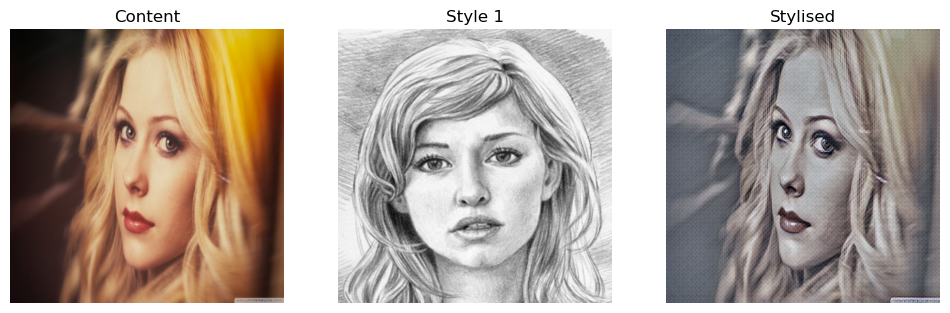

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


(0.591, 178.16037498414516)

In [20]:
highLRModel = AdaIN()
highLRModel.uploadEncoder(encoderL7)
highLRModel.epochTraining(train_content_loader, train_style_loader, "dn_default_highLR", steps = 20000, epoch = 5, style_weight = 1.0, content_weight=1.0, learn_rate = 1e-3)
highLRModel.fit(image_path,[style_path])
highLRModel.pipeline()
highLRModel.displayImages()
highLRModel.evaluate()